In [64]:
import pandas as po
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# read mushra.csv by pandas
df = po.read_csv('mushra.csv')
df

,session_test_id,session_uuid,trial_id,rating_stimulus,rating_score,rating_time,rating_comment
0,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,PS,23,82364,NaN
1,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,SS,39,82364,NaN
2,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,WS,69,82364,NaN
3,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,AN,13,82364,NaN
4,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,EL,77,82364,NaN
...,...,...,...,...,...,...,...
170,pitch_shift,61981bbe-c88c-4b11-bd31-d5042ab71f18,guitar_round,AN,0,65126,NaN
171,pitch_shift,61981bbe-c88c-4b11-bd31-d5042ab71f18,guitar_round,WS,100,65126,NaN
172,pitch_shift,61981bbe-c88c-4b11-bd31-d5042ab71f18,guitar_round,EL,97,65126,NaN
173,pitch_shift,61981bbe-c88c-4b11-bd31-d5042ab71f18,guitar_round,SS,9,65126,NaN


In [66]:
# delete record with trial_id == "training"
df = df[df['trial_id'] != 'training']

# delete columns except for "trial_id", "rating_stimulus", "rating_score"
df = df[['trial_id', 'rating_stimulus', 'rating_score']]

df

,trial_id,rating_stimulus,rating_score
5,mix_min_12,EL,21
6,mix_min_12,PS,44
7,mix_min_12,WS,59
8,mix_min_12,AN,7
9,mix_min_12,SS,76
...,...,...,...
170,guitar_round,AN,0
171,guitar_round,WS,100
172,guitar_round,EL,97
173,guitar_round,SS,9


In [67]:
# map rating score from 0-100 to 1-5 MOS scale
df['rating_score'] = df['rating_score'].map(lambda x: (x/100)*4+1)
df

,trial_id,rating_stimulus,rating_score
5,mix_min_12,EL,1.84
6,mix_min_12,PS,2.76
7,mix_min_12,WS,3.36
8,mix_min_12,AN,1.28
9,mix_min_12,SS,4.04
...,...,...,...
170,guitar_round,AN,1.00
171,guitar_round,WS,5.00
172,guitar_round,EL,4.88
173,guitar_round,SS,1.36


In [68]:
# group by "trial_id" and "rating_stimulus" and then caluculate mean and standard deviation of "rating_score"
df_grouped = df.groupby(['trial_id', 'rating_stimulus']).agg([np.mean, np.std])
df_grouped  

/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_31172/3710937881.py:2: FutureWarning: The provided callable <function mean at 0x10bc5a5c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_grouped = df.groupby(['trial_id', 'rating_stimulus']).agg([np.mean, np.std])
/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_31172/3710937881.py:2: FutureWarning: The provided callable <function std at 0x10bc5a700> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_grouped = df.groupby(['trial_id', 'rating_stimulus']).agg([np.mean, np.std])


rating_score          
                                     mean       std
trial_id     rating_stimulus                       
drums_round  AN                     2.232  1.278875
             EL                     3.968  0.376723
             PS                     2.896  0.907127
             SS                     3.800  0.876812
             WS                     3.568  0.645848
guitar_round AN                     1.272  0.242322
             EL                     4.160  0.531413
             PS                     3.512  0.310355
             SS                     2.848  1.154262
             WS                     4.416  0.485469
mix_min_12   AN                     1.144  0.205134
             EL                     2.192  0.906598
             PS                     2.296  0.351682
             SS                     3.280  0.938083
             WS                     3.320  1.065833
mix_plus_12  AN                     1.296  0.457471
             EL                     2.568  1.016819
             PS                     2.184  0.706880
             SS                     2.512  0.516449
             WS                     3.144  1.000240
mix_plus_7   AN                     1.216  0.304105
             EL                     3.408  0.597595
             PS                     2.216  0.454841
             SS                     3.304  0.403584
             WS                     3.568  0.252032
mix_round    AN                     1.120  0.246577
             EL                     2.608  1.222260
             PS                     2.112  0.658119
             SS                     4.112  0.814076
             WS                     3.736  0.404574

In [69]:
# trail id mapping dict
trial_id_mapping = {
    'mix_plus_12': 'Mix +12',
    'mix_plus_7': 'Mix +7',
    'mix_min_12': 'Mix -12',
    'mix_round': 'Mix Round Trip Up',
    'drums_round': 'Drums Round Trip Up',
    'guitar_round': 'Guitar Round Trip Up',
}
# map trial_id to their respective names
df_grouped = df_grouped.rename(index=trial_id_mapping)
df_grouped


rating_score          
                                             mean       std
trial_id             rating_stimulus                       
Drums Round Trip Up  AN                     2.232  1.278875
                     EL                     3.968  0.376723
                     PS                     2.896  0.907127
                     SS                     3.800  0.876812
                     WS                     3.568  0.645848
Guitar Round Trip Up AN                     1.272  0.242322
                     EL                     4.160  0.531413
                     PS                     3.512  0.310355
                     SS                     2.848  1.154262
                     WS                     4.416  0.485469
Mix -12              AN                     1.144  0.205134
                     EL                     2.192  0.906598
                     PS                     2.296  0.351682
                     SS                     3.280  0.938083
                     WS                     3.320  1.065833
Mix +12              AN                     1.296  0.457471
                     EL                     2.568  1.016819
                     PS                     2.184  0.706880
                     SS                     2.512  0.516449
                     WS                     3.144  1.000240
Mix +7               AN                     1.216  0.304105
                     EL                     3.408  0.597595
                     PS                     2.216  0.454841
                     SS                     3.304  0.403584
                     WS                     3.568  0.252032
Mix Round Trip Up    AN                     1.120  0.246577
                     EL                     2.608  1.222260
                     PS                     2.112  0.658119
                     SS                     4.112  0.814076
                     WS                     3.736  0.404574

In [70]:
# sort alphabetically by the following order: mix -12, mix +7, mix +12, mix round trip up, drums, guitar, 
df_grouped = df_grouped.reindex(['Mix -12', 'Mix +7', 'Mix +12', 'Mix Round Trip Up', 'Drums Round Trip Up', 'Guitar Round Trip Up'], level=0)
# df_grouped = df_grouped.sort_index()
df_grouped

rating_score          
                                             mean       std
trial_id             rating_stimulus                       
Mix -12              AN                     1.144  0.205134
                     EL                     2.192  0.906598
                     PS                     2.296  0.351682
                     SS                     3.280  0.938083
                     WS                     3.320  1.065833
Mix +7               AN                     1.216  0.304105
                     EL                     3.408  0.597595
                     PS                     2.216  0.454841
                     SS                     3.304  0.403584
                     WS                     3.568  0.252032
Mix +12              AN                     1.296  0.457471
                     EL                     2.568  1.016819
                     PS                     2.184  0.706880
                     SS                     2.512  0.516449
                     WS                     3.144  1.000240
Mix Round Trip Up    AN                     1.120  0.246577
                     EL                     2.608  1.222260
                     PS                     2.112  0.658119
                     SS                     4.112  0.814076
                     WS                     3.736  0.404574
Drums Round Trip Up  AN                     2.232  1.278875
                     EL                     3.968  0.376723
                     PS                     2.896  0.907127
                     SS                     3.800  0.876812
                     WS                     3.568  0.645848
Guitar Round Trip Up AN                     1.272  0.242322
                     EL                     4.160  0.531413
                     PS                     3.512  0.310355
                     SS                     2.848  1.154262
                     WS                     4.416  0.485469

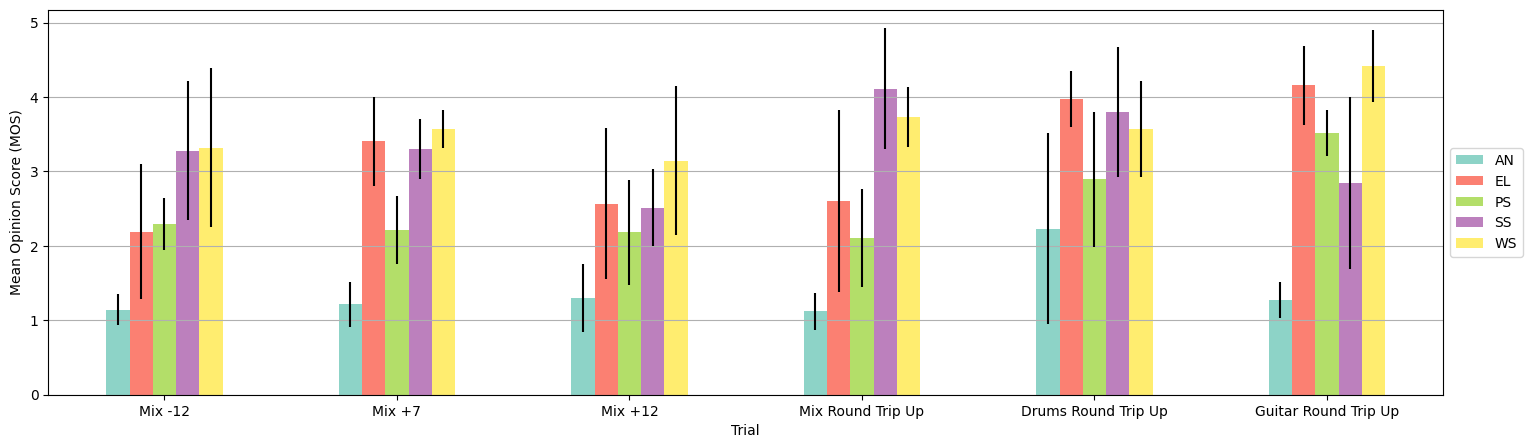

In [76]:
# plot the result with seperate an error bar for each stimulus
fig, ax = plt.subplots()
fig.set_size_inches(18, 5) # set size to 18x5
df_grouped['rating_score'].unstack().plot(kind='bar', y='mean', yerr='std', ax=ax, colormap='Set3')
ax.yaxis.grid(True) # add horizontal grid lines
ax.set_xlabel('Trial')
ax.set_ylabel('Mean Opinion Score (MOS)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # set x labels to be written horizontally
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # show legend outside of the plot on the right side
plt.show()